# Data Normalization: Comparing Police Violence in North America

## Learing Outcomes:
1) Understand how data normalization impacts the way we perceive patterns in a dataset

2) Understand different data clasification methods and how they impact the way we percieve patterns in a dataset

3) Revisit measurement scales, how are they related to classification methods

4) Using data nomralization and classification to create indices

5) Chloropleth mapping!!

# Content Warning:
* This lecture/workshop deals with a dificult and painful subject that may be triggering to some people.  The datasets we're using today describe incedents of police killings in Canada and the United States


## Pre-Lecture Poll questions:

### 1) In which country has a higher frequency of police violence?
    A) Canada
    B) The United States
    C) They're about equal
    
### 2) Which country has a greater racial disparity in incidetns of police violence?
    A) Canada
    B) The United States
    C) They're about equal

In [1]:
## This module aggregates the data into a format that's easy for us to work with
import ParseData
## We'll use maptloltib to make some plots
import matplotlib.pyplot as plt
%matplotlib notebook

## Calling "GetData" does all of our prepprocessing
Data = ParseData.GetData()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# This is the raw data.  I'm showing:

* ### 1) The total number of police killings for both countries by year.
    * The Canadian Data covers January 2000 - June 2020
    * The United States Data covers January 2013 - August 2020

* ### 2) The number of police killings for each country.
    * The populations of each country are different
        * the US has about 10x as many people as Canada
    * The periods of record are different for the two datasets

* ### 3) The racial breakdown of police killings for each country.
    * Demographic groups are not evenly represented in the populations of Canada and the United States
    * This skews the breakdown and makes it look like white people are more likely to experience police violicne
        * However: Canada is about 75% white and the United States is about 65% white, so this is to be expected

<IPython.core.display.Javascript object>


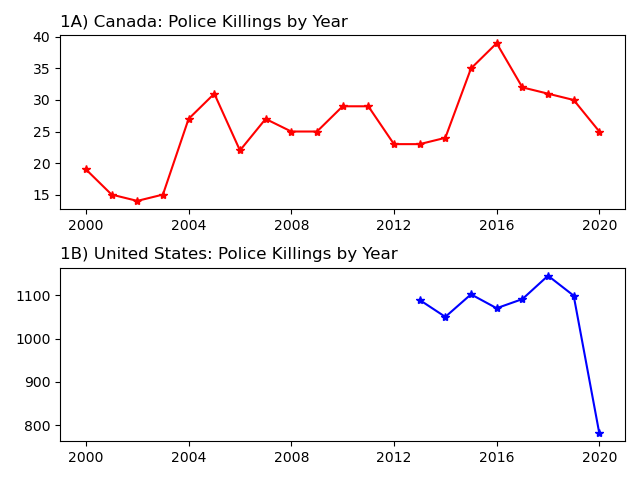

<IPython.core.display.Javascript object>


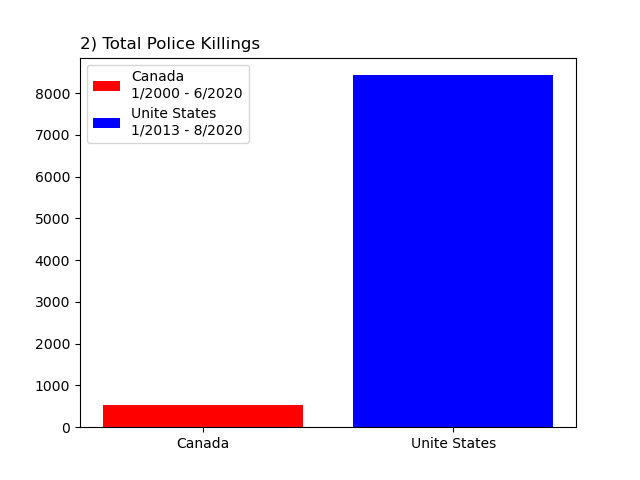

<IPython.core.display.Javascript object>


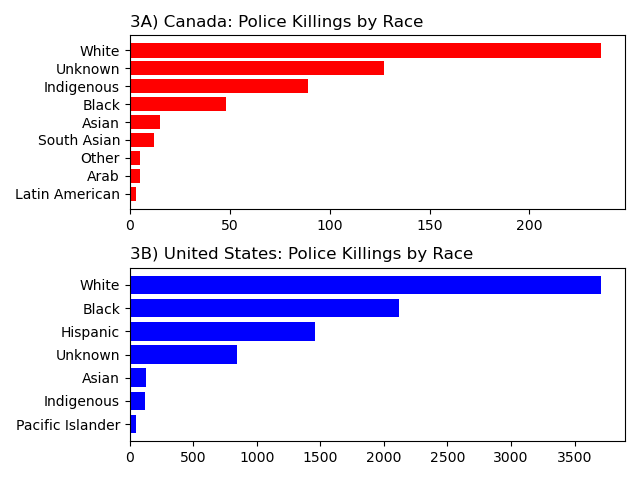

In [2]:
CA_Total=Data.CA_PoliceKillings['AGE'].count()
US_Total=Data.US_PoliceKillings["Victim's age"].count()


fig,ax=plt.subplots(2,1)
ax[0].set_title('1A) Canada: Police Killings by Year',loc='left')
ByYear=Data.CA_PoliceKillings.resample('YS').count()['AGE']
ax[0].plot(ByYear.index,ByYear.values,marker='*',color=[1,0,0])

ax[1].set_title('1B) United States: Police Killings by Year',loc='left')
ByYear=Data.US_PoliceKillings.resample('YS').count()["Victim's age"]
ax[1].plot(ByYear.index,ByYear.values,marker='*',color=[0,0,1])
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()

fig,ax=plt.subplots()
ax.bar([0],CA_Total,color=[1,0,0],label='Canada\n1/2000 - 6/2020')
ax.bar([1],US_Total,color=[0,0,1],label='Unite States\n1/2013 - 8/2020')
ax.set_xticks([0,1])
ax.set_xticklabels(['Canada','Unite States'])
ax.set_title('2) Total Police Killings',loc='left')
ax.legend()


fig,ax=plt.subplots(2,1)
ax[0].set_title('3A) Canada: Police Killings by Race',loc='left')
ByRace=Data.CA_PoliceKillings.groupby('RACE').count()['AGE'].sort_values()
ax[0].barh(ByRace.index,ByRace.values,color=[1,0,0])

ax[1].set_title('3B) United States: Police Killings by Race',loc='left')
ByRace=Data.US_PoliceKillings.groupby('RACE').count()["Victim's age"].sort_values()
ax[1].barh(ByRace.index,ByRace.values,color=[0,0,1])
plt.tight_layout()



# To get a better idea of whats going on, we need to Normalize our data.
* Normalization is when you take one number (ie. Total Police Killings) and divide it by other numbers (ie. Total Population)
    * Lets recreate graph 1, but we'll normalize our data population counts from the 2016 Canadian Census and 2018 US Census estimates

<IPython.core.display.Javascript object>


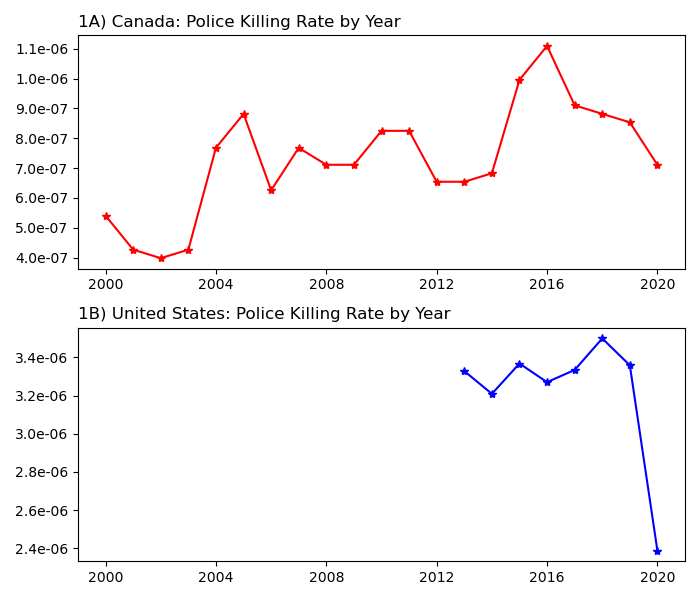

In [3]:

import matplotlib.ticker as mtick

fig,ax=plt.subplots(2,1,figsize=(7,6))
ax[0].set_title('1A) Canada: Police Killing Rate by Year',loc='left')
ByYear=Data.CA_PoliceKillings.resample('YS').count()['AGE']/Data.CA.Total.sum()
ax[0].plot(ByYear.index,ByYear.values,marker='*',color=[1,0,0])
ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax[1].set_title('1B) United States: Police Killing Rate by Year',loc='left')
ByYear=Data.US_PoliceKillings.resample('YS').count()["Victim's age"]/Data.US.Total.sum()
ax[1].plot(ByYear.index,ByYear.values,marker='*',color=[0,0,1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.tight_layout()

# Notice that the numbers on the y axis are very small
* We've calculated the nubmer of police killings per person.  To make the numbers more inteilgible, we might want to scale them, by say 1 million (1e6) 


<IPython.core.display.Javascript object>


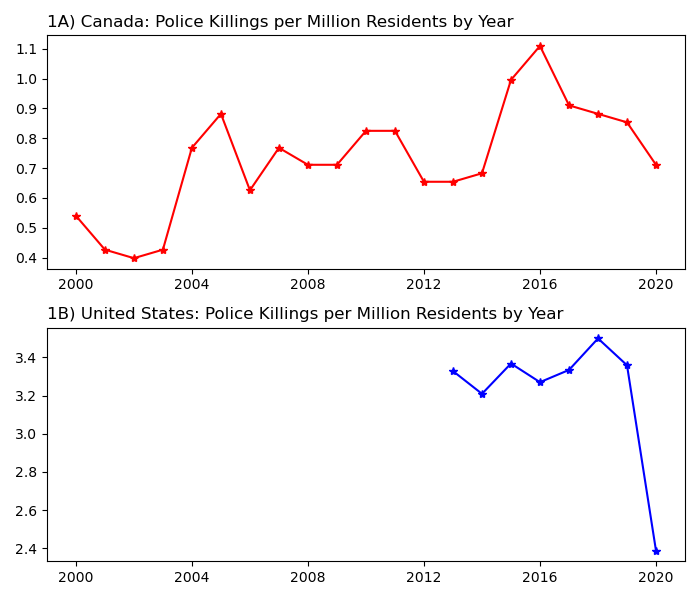

In [4]:
fig,ax=plt.subplots(2,1,figsize=(7,6))
ax[0].set_title('1A) Canada: Police Killings per Million Residents by Year',loc='left')
ByYear=Data.CA_PoliceKillings.resample('YS').count()['AGE']/Data.CA.Total.sum()*1e6
ax[0].plot(ByYear.index,ByYear.values,marker='*',color=[1,0,0])
# ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax[1].set_title('1B) United States: Police Killings per Million Residents by Year',loc='left')
ByYear=Data.US_PoliceKillings.resample('YS').count()["Victim's age"]/Data.US.Total.sum()*1e6
ax[1].plot(ByYear.index,ByYear.values,marker='*',color=[0,0,1])
ax[1].set_xlim(ax[0].get_xlim())
# ax[1].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.tight_layout()

# To calculate the average rate over the whole dataset, we'll also need ot acount for the record legnth

So our normalization calculation would look like:
    
\begin{align}
\ Police Killing Rate & = (\frac{Total Police Killings}{Total Population * Record Length})* 1e6 \\
\end{align}

* Recreating plot #2 would look like:


<IPython.core.display.Javascript object>


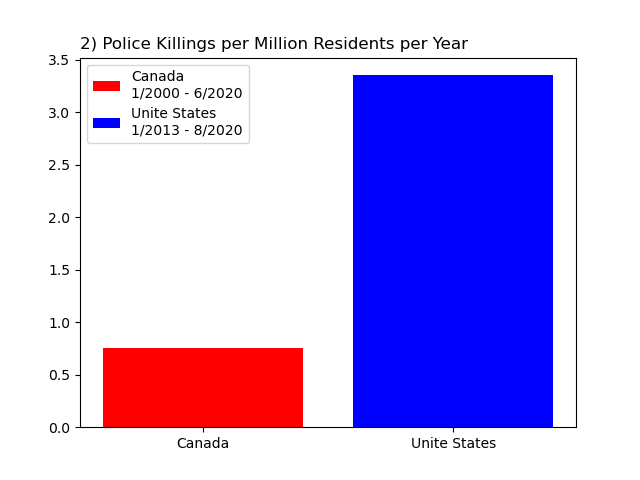

In [5]:
# fig,ax=plt.subplots()

CA_Rate = CA_Total /(Data.CA.Total.sum()*Data.CA_Length) * 1e6
US_Rate = US_Total /(Data.US.Total.sum()*Data.US_Length) * 1e6

# ax.bar([0,1],[CA_Rate,US_Rate])
# ax.set_xticks([0,1])
# ax.set_xticklabels(['Canadian Jan 2000 - June 2020',
#                     'Unite States Jan 2013 - Aug 2020'])
# ax.set_title('Police Killings per Million Residents per Year')



fig,ax=plt.subplots()
ax.bar([0],CA_Rate,color=[1,0,0],label='Canada\n1/2000 - 6/2020')
ax.bar([1],US_Rate,color=[0,0,1],label='Unite States\n1/2013 - 8/2020')
ax.set_xticks([0,1])
ax.set_xticklabels(['Canada','Unite States'])
ax.set_title('2) Police Killings per Million Residents per Year',loc='left')
ax.legend()
# print(US_Rate/CA_Rate)

# By normalizing, we can more directly compare the patterns between geographic regions with different characteristics (Population) and datasets of different lenghts

* We can see that Police Violence rates in the US are about 4.5 x higher than in Canada.
    
* But this doesn't tell us the full story either.  There is are significant racial disparities in the police killings on both sides of the border
    * Demographics are not evenly distributed within or between countries, so we need to acount for that with normalization
    * The Canadian census and Untied States census used different racial groupings so it is difficult to compare across all demographics.
    * The police violence datasets for each country also use slightly different demographic groupings than their respective censuses.
        * This makes the comparissons even less stragithforwar.
    * White, black, and indigenous are in both police violence datasets and are available from both sets of census data.
        * Whites are the majority in both contries, while black and indgenous people disporportionately impacted by police killings on both sides of the border.  So we'll focus on these three groups.
* One Caveat, the race of the victim is unknown for 24% of Canadian and 10% of United States.  This adds uncertainty to the comparison.  It also means that the Police Killing Rates by race are underestimated, especially for Canada
    * This is partly becasue these datasets were collected by third party organizations
        * The Canadian Data was collected by the CBC
        * The US Data was collected by the non-profit Mapping Police Violence
    * These datsets rely on media reports and are likely incomplete
    * Police departments and governments should be responsible for collecting and publishing this information to ensure better acountability, however police and governments around North America have failed to do so

Police Killing Rates:
                  US        CA
Total       3.353979  0.750329
White       2.046058  0.446725
Black       6.636197  1.956103
Indigenous  5.484477  2.597146


<IPython.core.display.Javascript object>


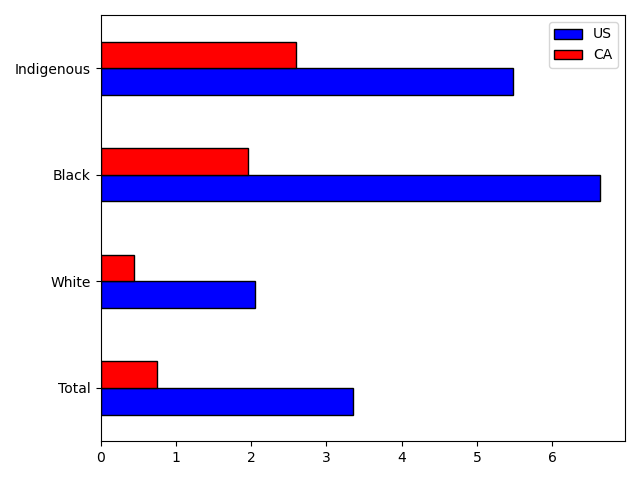

In [6]:
Data.ScaleData(scale=1e6)
print('Police Killing Rates:')
print(Data.Summary)

Data.Summary.plot.barh(color=[[0,0,1],[1,0,0]],edgecolor='k')

plt.tight_layout()


<IPython.core.display.Javascript object>


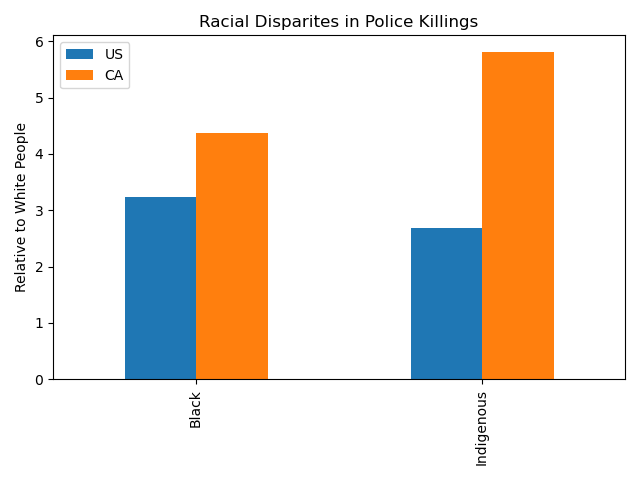

In [7]:
Ratio = Data.Summary.loc[Data.Summary.index=='Black']/Data.Summary.loc[Data.Summary.index=='White'].values
Ratio = Ratio.append(Data.Summary.loc[Data.Summary.index=='Indigenous']/Data.Summary.loc[Data.Summary.index=='White'].values)

Ratio.plot.bar()
plt.title('Racial Disparites in Police Killings')
plt.ylabel('Relative to White People')
plt.tight_layout()
# print(Data.CA.columns)
# Ratio

# Histograms and Classification Schemes

<IPython.core.display.Javascript object>


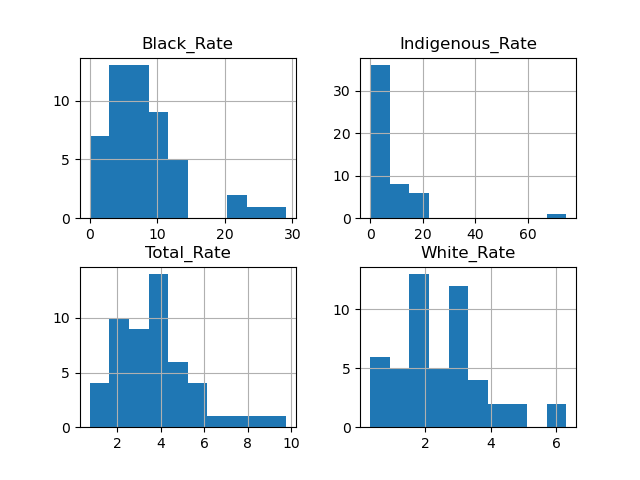

<IPython.core.display.Javascript object>


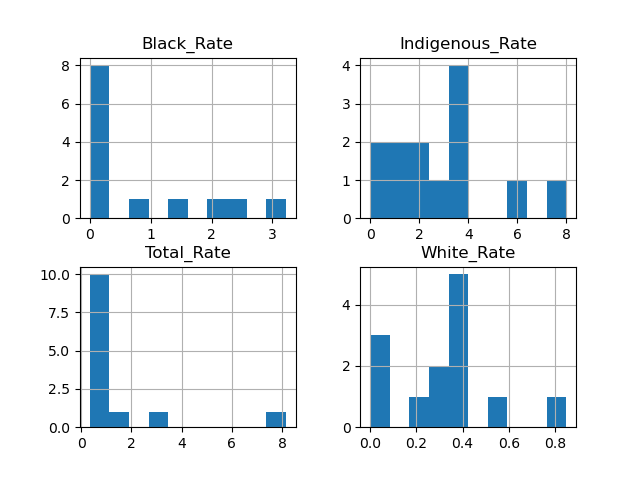

<IPython.core.display.Javascript object>


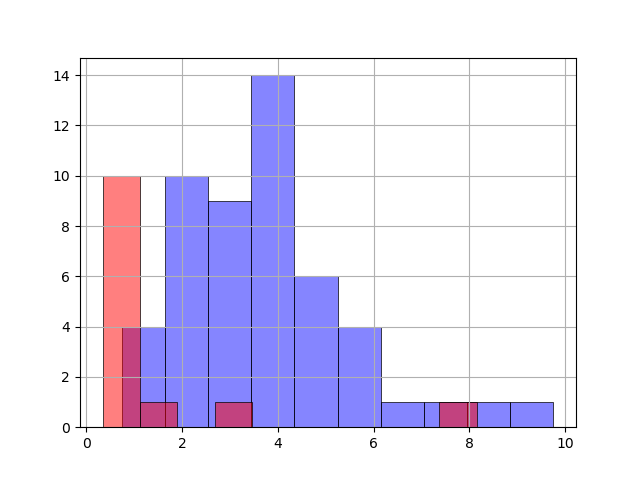

In [8]:
# plt.figure()
import numpy as np

# AllRates = Data.US[['Indigenous_Rate','Black_Rate','White_Rate','Total_Rate']]

Data.US[['Indigenous_Rate','Black_Rate','White_Rate','Total_Rate']].hist()

Data.CA[['Indigenous_Rate','Black_Rate','White_Rate','Total_Rate']].hist()




fig,ax=plt.subplots()

Data.US['Total_Rate'].hist(ax=ax,color=[.05,.05,1,.5],edgecolor='k',linewidth=.5,bins=10)
Data.CA['Total_Rate'].hist(ax=ax,color=[1,.0,.0,.5],edgecolor='k',linewidth=.5,bins=10)

# AllRates.hist(edgecolor='k')
# Data.US['Indigenous_Rate'].hist(bins=np.arange(0,80,1),edgecolor='k')

# Data.CA['Indigenous_Rate'].hist(bins=np.arange(0,80,1),edgecolor='k')

<IPython.core.display.Javascript object>


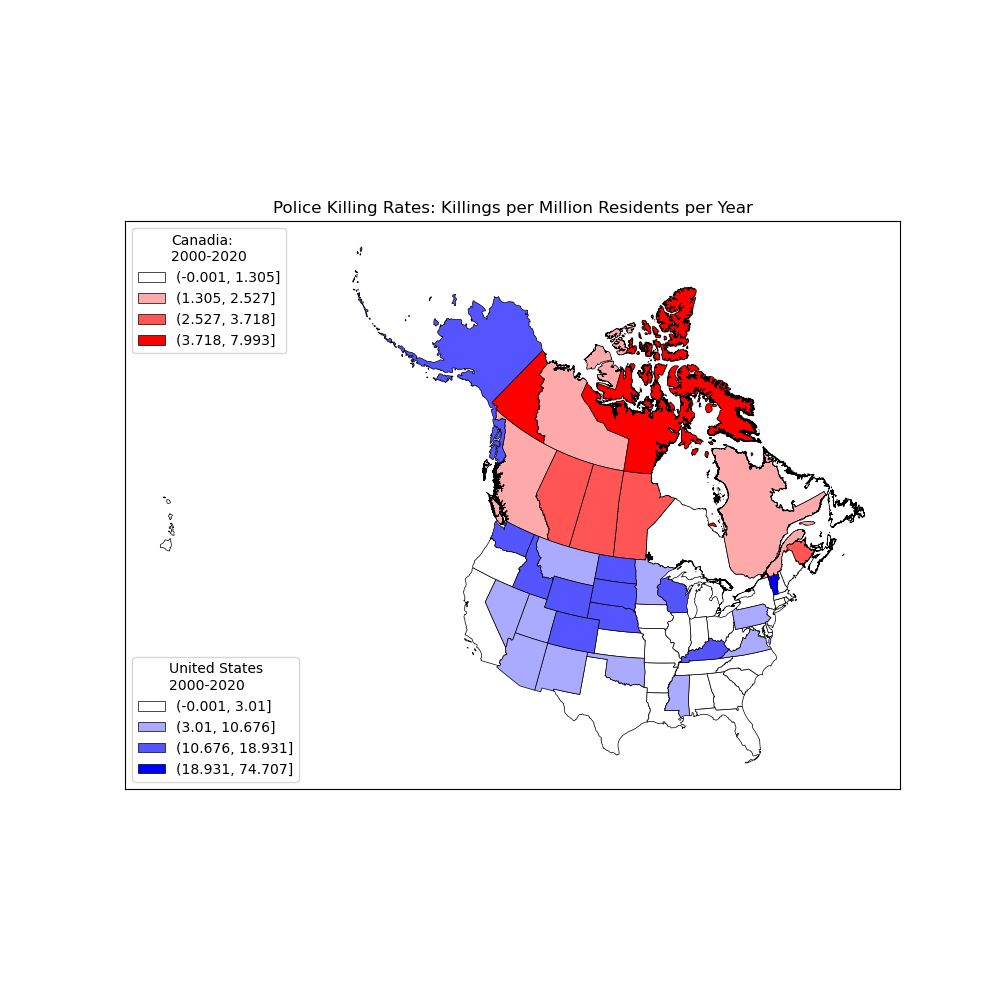

#ffffff
#ffaaaa
#ff5555
#ff0000


C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj

Text(0.5, 1.0, 'Police Killing Rates: Killings per Million Residents per Year')

In [9]:
import matplotlib
import matplotlib.patches as mpatches

Rate = 'Indigenous'+'_'
n_classes=4
Data.NaturalBreaks(column=Rate+'Rate',classes=n_classes)
labels=Data.CA[Rate+'Rate_NB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1,1-c/(n_classes-1),1-c/(n_classes-1)]))
CA_Color = {key:value for key,value in zip(labels,colors)}
# print(CA_Color)


fig,ax=plt.subplots(figsize=(10,10))
CA_Patches = []
for klass in Data.CA[Rate+'Rate_NB'].unique().sort_values():
    print(CA_Color[klass])
    kwargs = {'facecolor':CA_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.CA.loc[Data.CA[Rate+'Rate_NB']==klass].plot(
        ax=ax,
        **kwargs
             )
    CA_Patches.append(mpatches.Patch(**kwargs))

    
labels=Data.US[Rate+'Rate_NB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1-c/(n_classes-1),1-c/(n_classes-1),1]))
US_Color = {key:value for key,value in zip(labels,colors)}

US_Patches = [] 
for klass in Data.US[Rate+'Rate_NB'].unique().sort_values():
    kwargs = {'facecolor':US_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.US.to_crs(Data.CA.crs).loc[Data.US[Rate+'Rate_NB']==klass].plot(
        ax=ax,
        **kwargs
             )
    US_Patches.append(mpatches.Patch(**kwargs))
    
first_legend = plt.legend(handles=CA_Patches, loc='upper left',
      title='Canadia:\n2000-2020')

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=US_Patches, loc='lower left',
      title='United States\n2000-2020')

plt.show()
    
    
# ax.legend(handles={'PKR':Patches},) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Police Killing Rates: Killings per Million Residents per Year')

# Data.CA.plot(
#     column=Rate+'Rate_NB',
#     cmap = 'Blues',
#     edgecolor='black',
#     linewidth=.5,
#     ax=ax)
# Data.US.to_crs(Data.CA.crs).plot(
#     column=Rate+'Rate_NB',
#     cmap = 'Reds',
#     edgecolor='black',
#     linewidth=.5,
#     ax=ax)

In [10]:
# Data.NaturalBreaks(column='Indigenous_Rate',classes=5)
# print(Data.CA['Indigenous_Rate'])
# labels=Data.CA['Indigenous_Rate_NB'].unique().sort_values()
# print(labels)

Data.US[['Indigenous','Indigenous_Killings','Indigenous_Rate']].sort_values('Indigenous')

,Indigenous,Indigenous_Killings,Indigenous_Rate
STUSPS,,,
VT,1743,1.0,74.706772
DC,1932,NaN,0.000000
WV,2629,NaN,0.000000
HI,3237,NaN,0.000000
NH,3562,NaN,0.000000
RI,4341,NaN,0.000000
DE,4397,NaN,0.000000
KY,8470,1.0,15.373542
ME,8566,NaN,0.000000
